#**Curso de Séries Temporais da Alura**



##**Alucar - Analisando as vendas**

Melhorar a visualização de dados

https://urbaninstitute.github.io/graphics-styleguide/

In [266]:
#Importando as bibliotecas

import pandas as pd

In [267]:
#Criando um dataframe

alucar = pd.read_csv('https://raw.githubusercontent.com/eduardoparada/cursos_alura_DS/main/DS_series_temporais/Arquivos%20complementares/alucar.csv', sep =',')

In [268]:
#Verificando a criação do df

alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [269]:
#Verificando quantidade de linhas e colunas

print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [270]:
#Verificando dados nulos

print("Quantidade de dados nulos:", alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [271]:
#Verificando os tipos de dados

alucar.dtypes

mes       object
vendas     int64
dtype: object

In [272]:
#convertendo a colunas pra datetime

alucar['mes'] = pd.to_datetime(alucar['mes'])

In [273]:
#verificando a conversao
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [274]:
#importando seaborn e matplotlib para construção de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [275]:
#verificando a versao do seaborn --> da pra fazer pra qualquer biblioteca

print(sns.__version__)

0.13.1


Text(0.0, 1.0, 'Relação Vendas X Mês - Alucar - Período 2017-2018 \n')

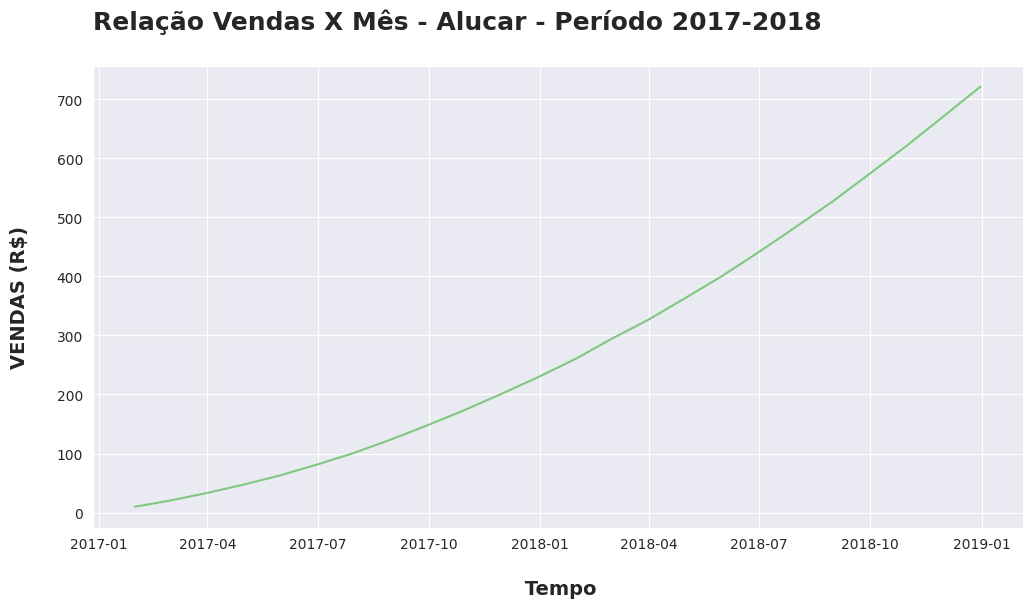

In [276]:
#gráfico de linha pra verificar as vendas
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data = alucar) #ax como variável remove informações indesejadas do gráfico
ax.figure.set_size_inches(12,6) #Tamanho da visualização do gráfico
plt.xlabel('\n Tempo', fontsize = 14, fontweight ='bold')
plt.ylabel('VENDAS (R$)\n',fontsize = 14, fontweight ='bold')
plt.title('Relação Vendas X Mês - Alucar - Período 2017-2018 \n', loc='left',fontsize = 18, fontweight ='bold')

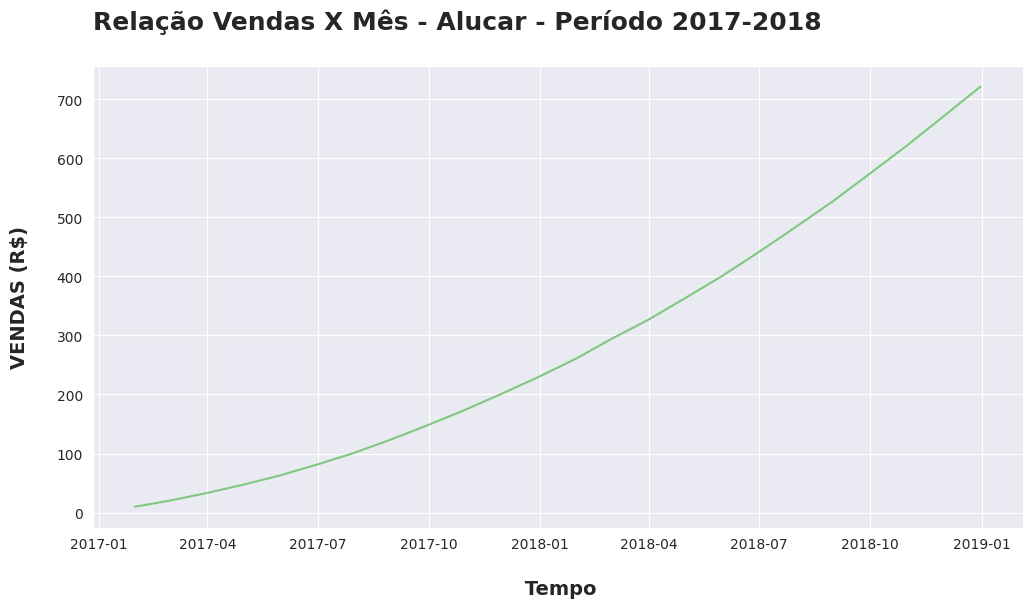

In [277]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data = alucar) #ax como variável remove informações indesejadas do gráfico
ax.figure.set_size_inches(12,6) #Tamanho da visualização do gráfico
plt.xlabel('\n Tempo', fontsize = 14, fontweight ='bold')
plt.ylabel('VENDAS (R$)\n',fontsize = 14, fontweight ='bold')
plt.title('Relação Vendas X Mês - Alucar - Período 2017-2018 \n', loc='left',fontsize = 18, fontweight ='bold')
ax = ax #remove informações indesejadas

## **Decomposição**

In [278]:
#chamando o df para começar a analisar

alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [279]:
#criando uma coluna para analisar o aumento das vendas

alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


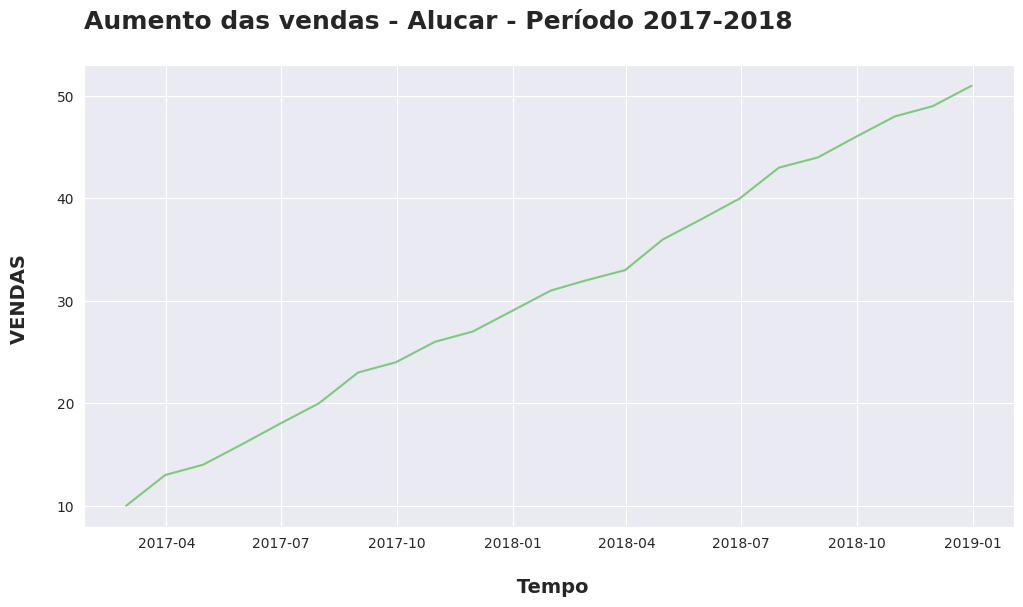

In [280]:
#Aumento da vendas da alucar 2017-2018

sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data = alucar) #ax como variável remove informações indesejadas do gráfico
ax.figure.set_size_inches(12,6) #Tamanho da visualização do gráfico
plt.xlabel('\n Tempo', fontsize = 14, fontweight ='bold')
plt.ylabel('VENDAS \n',fontsize = 14, fontweight ='bold')
plt.title('Aumento das vendas - Alucar - Período 2017-2018 \n', loc='left',fontsize = 18, fontweight ='bold')
ax = ax #remove informações indesejadas

In [281]:
#criando uma função para plotar os gráficos

def plotar(titulo, labelx, labely, x, y, dataset): #cada variavel dentro dos parenteses é trocada e colocada no lugar respectivo dentro da função
  sns.set_palette('Accent')                        #pra ver os parametros é só apertar TAB quando chamar a função
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,8)
  plt.xlabel(labelx, fontsize = 14, fontweight ='bold')
  plt.ylabel(labely,fontsize = 14, fontweight ='bold')
  plt.title(titulo, loc='left',fontsize = 18, fontweight ='bold')
  ax = ax

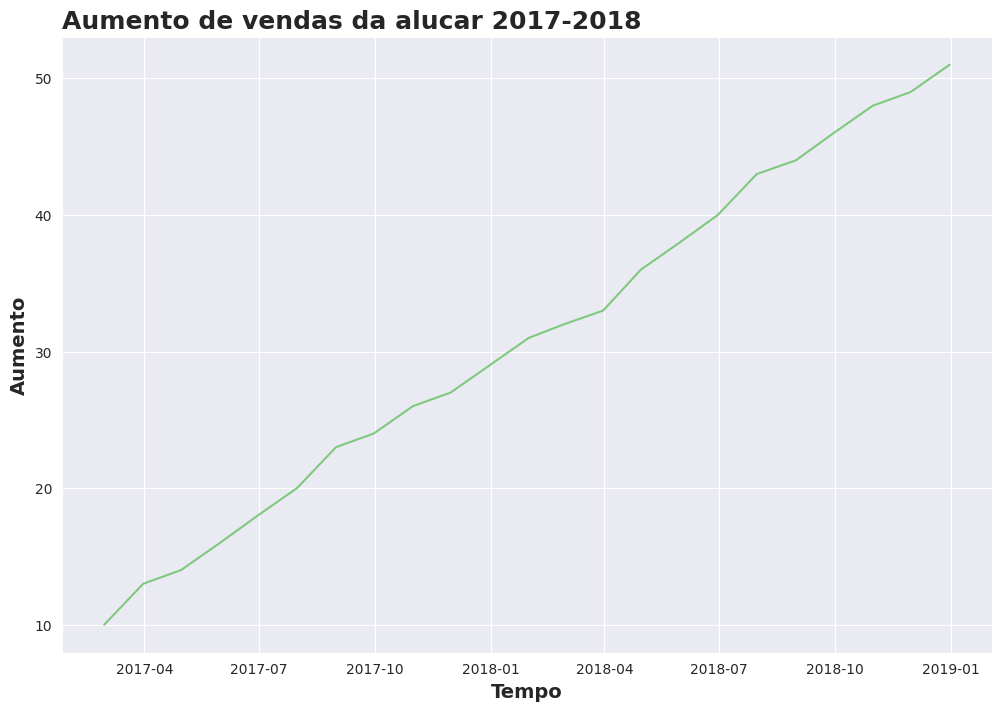

In [282]:
plotar("Aumento de vendas da alucar 2017-2018",'Tempo','Aumento','mes','aumento', alucar)

In [283]:
#criando a coluna aceleração com a decomposição da coluna aumento

alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


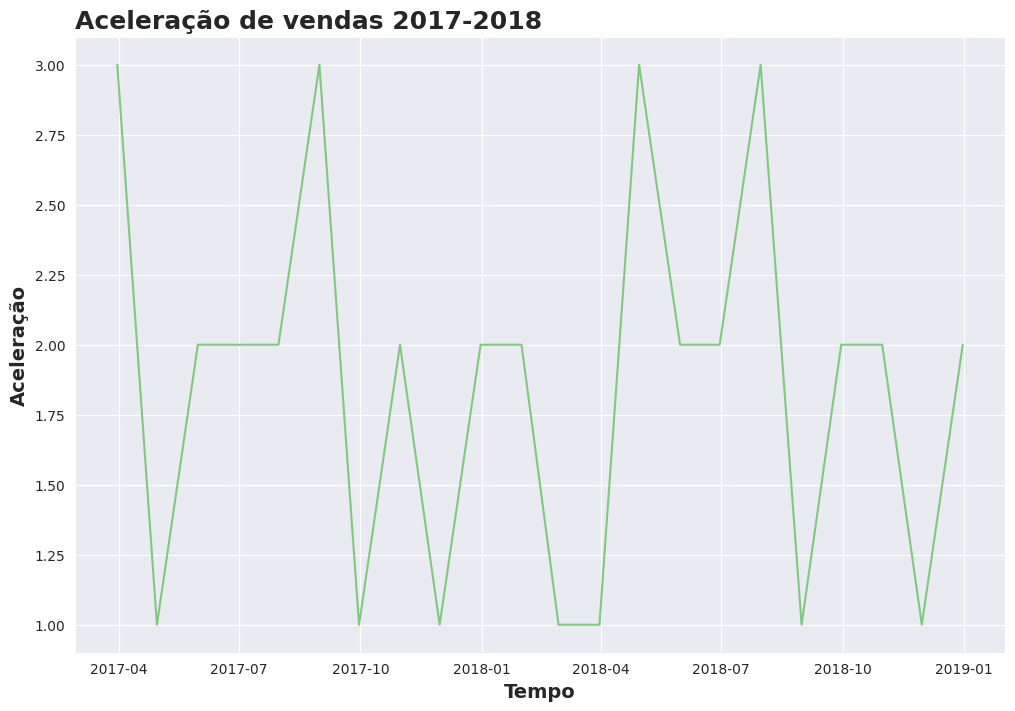

In [284]:
plotar('Aceleração de vendas 2017-2018', 'Tempo','Aceleração','mes','aceleracao',alucar)

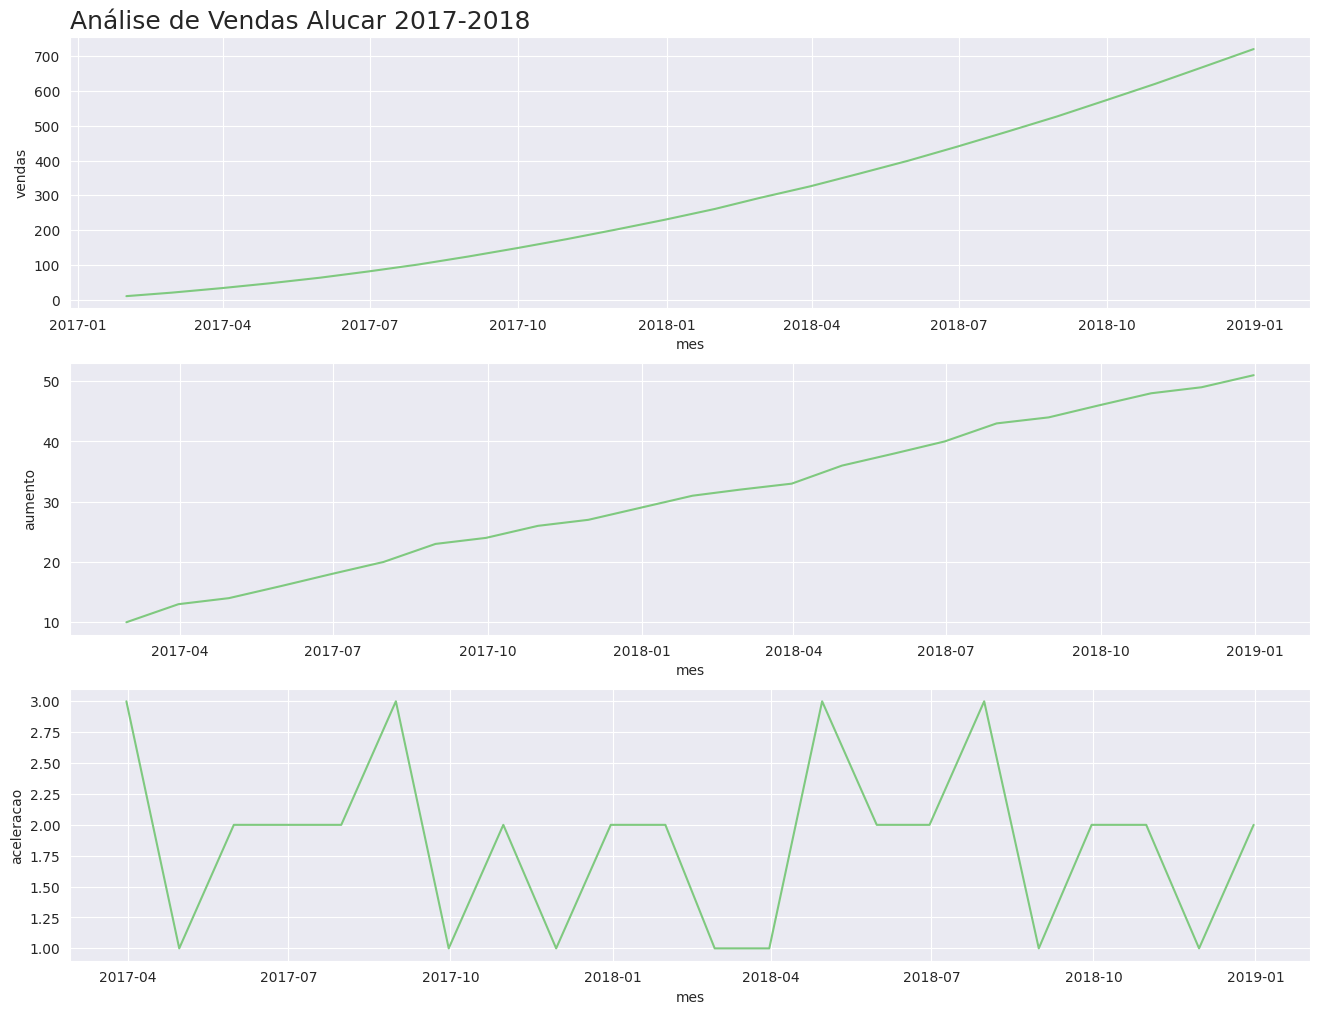

In [285]:
#juntado os tres gráficos para melhorar nossa observação

plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1) #divisão e 1ªposição
ax.set_title('Análise de Vendas Alucar 2017-2018', fontsize= 18, loc='left')
sns.lineplot(x='mes',y='vendas', data=alucar)
ax = plt.subplot(3,1,2)#divisão e 2ªposição
sns.lineplot(x='mes',y='aumento', data=alucar)
ax = plt.subplot(3,1,3)#divisão e 3ªposição
sns.lineplot(x='mes',y='aceleracao', data=alucar)
ax=ax

In [286]:
#criando uma função que defina esses parametros
def plot_comparacao(x,y1,y2,y3,dataset,titulo):
  plt.figure(figsize=(14,10))
  ax = plt.subplot(3,1,1) #divisão e 1ªposição
  ax.set_title(titulo, fontsize= 18, loc='left')
  sns.lineplot(x=x,y=y1, data=dataset)
  ax = plt.subplot(3,1,2)#divisão e 2ªposição
  sns.lineplot(x=x,y=y2, data=dataset)
  ax = plt.subplot(3,1,3)#divisão e 3ªposição
  sns.lineplot(x=x,y=y3, data=dataset)
  ax=ax

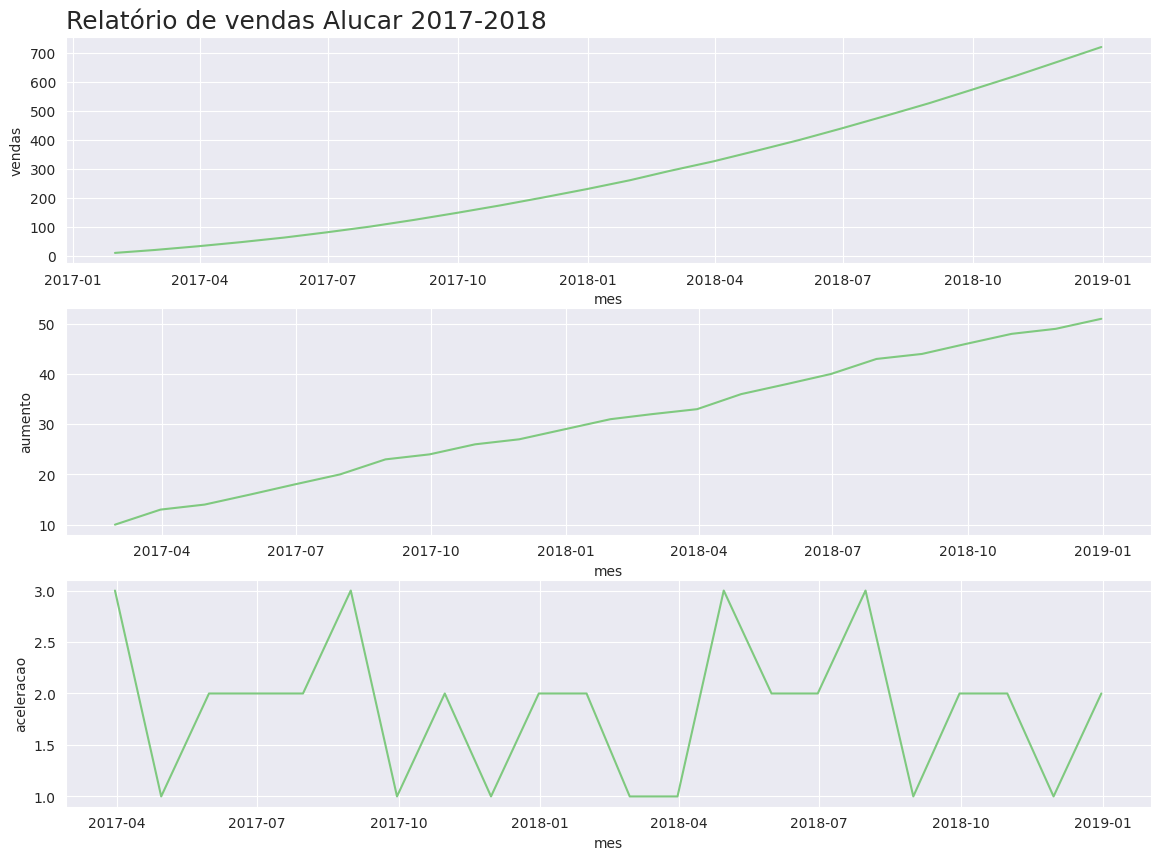

In [287]:
#testando a função

plot_comparacao('mes','vendas','aumento','aceleracao',alucar,'Relatório de vendas Alucar 2017-2018')

## **Autocorrelação**

In [288]:
#Importando a biblioteca

from pandas.plotting import autocorrelation_plot

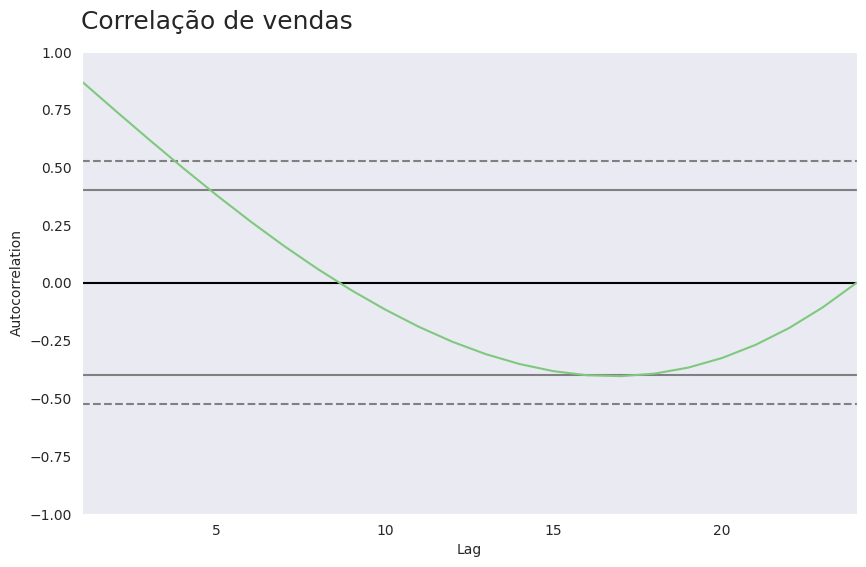

In [289]:
ax=plt.figure(figsize = (10,6))
ax.suptitle('Correlação de vendas', fontsize = 18, x=0.26, y=0.95)
ax = autocorrelation_plot(alucar['vendas'])
ax = ax

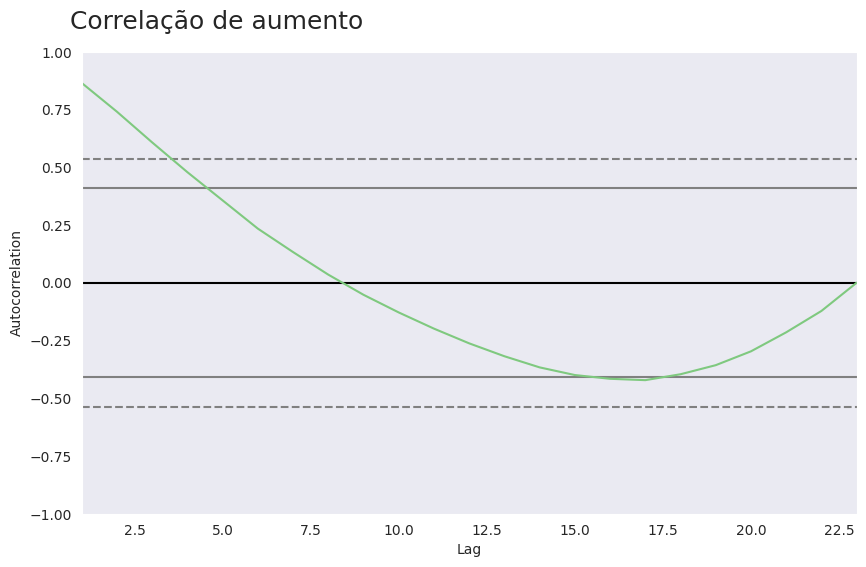

In [290]:
ax=plt.figure(figsize = (10,6))
ax.suptitle('Correlação de aumento', fontsize = 18, x=0.26, y=0.95)
ax = autocorrelation_plot(alucar['aumento'][1:])#o indice começa em 1
ax = ax

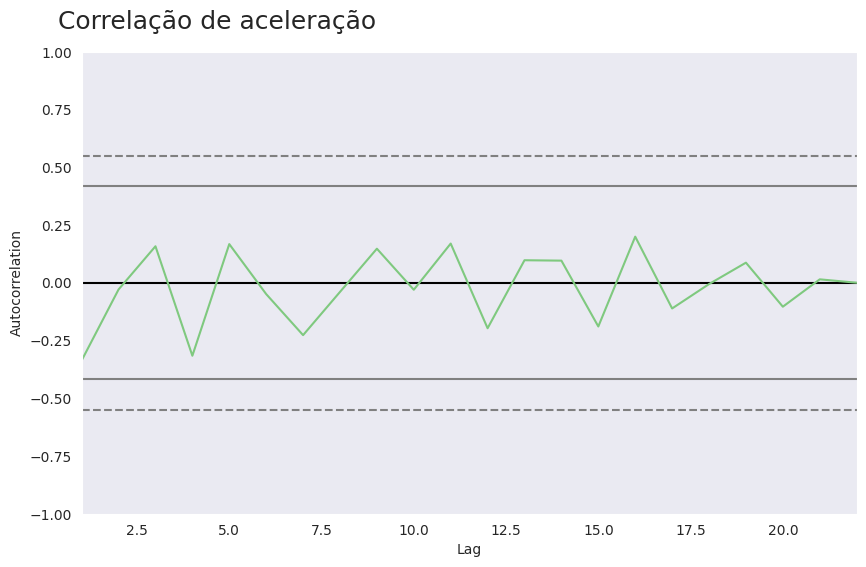

In [291]:
ax=plt.figure(figsize = (10,6))
ax.suptitle('Correlação de aceleração', fontsize = 18, x=0.26, y=0.95)
ax = autocorrelation_plot(alucar['aceleracao'][2:])#o indice começa em 2
ax = ax

## **Importância da decomposição e sazonalidade**

**Alucar - Analisando assinantes da newsletter**

In [292]:
assinantes = pd.read_csv('https://raw.githubusercontent.com/eduardoparada/cursos_alura_DS/main/DS_series_temporais/Arquivos%20complementares/newsletter_alucar.csv', sep =',')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [293]:
#analisando todos os dados

print('Quantidade de linhas e colunas:', assinantes.shape)
print("Quantidade de dados nulos:", assinantes.isna().sum().sum())
assinantes.dtypes

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


mes           object
assinantes     int64
dtype: object

In [294]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [295]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [296]:
#fazendo o diff para aumento do numero de assinantes

assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


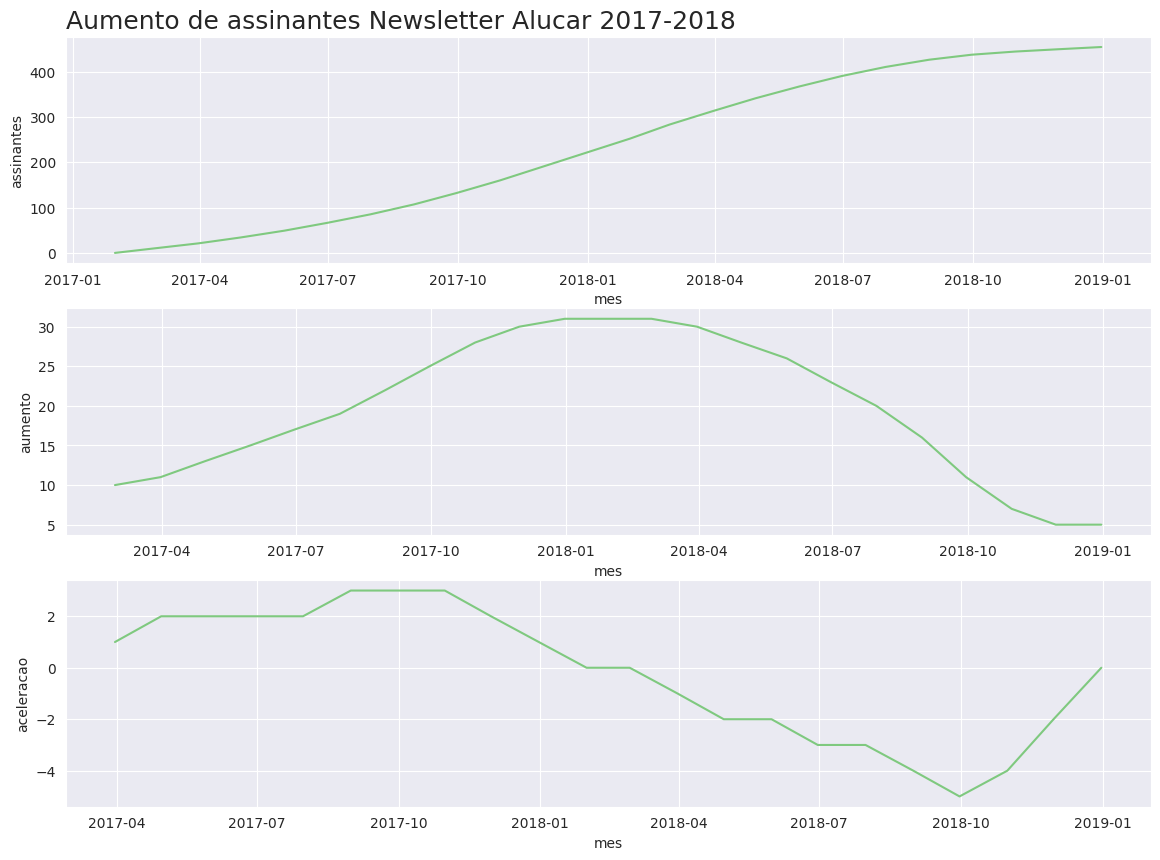

In [297]:
plot_comparacao('mes','assinantes','aumento','aceleracao',assinantes,'Aumento de assinantes Newsletter Alucar 2017-2018')

## **Analisando a sazonalidade**

**Chocolura - Analisando as vendas**

In [298]:
chocolura = pd.read_csv('https://raw.githubusercontent.com/eduardoparada/cursos_alura_DS/main/DS_series_temporais/Arquivos%20complementares/chocolura.csv', sep=',')

In [299]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [300]:
print('Quantidade de linhas e colunas:', chocolura.shape)
print("Quantidade de dados nulos:", chocolura.isna().sum().sum())
chocolura.dtypes

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


mes       object
vendas     int64
dtype: object

In [301]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [302]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [303]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


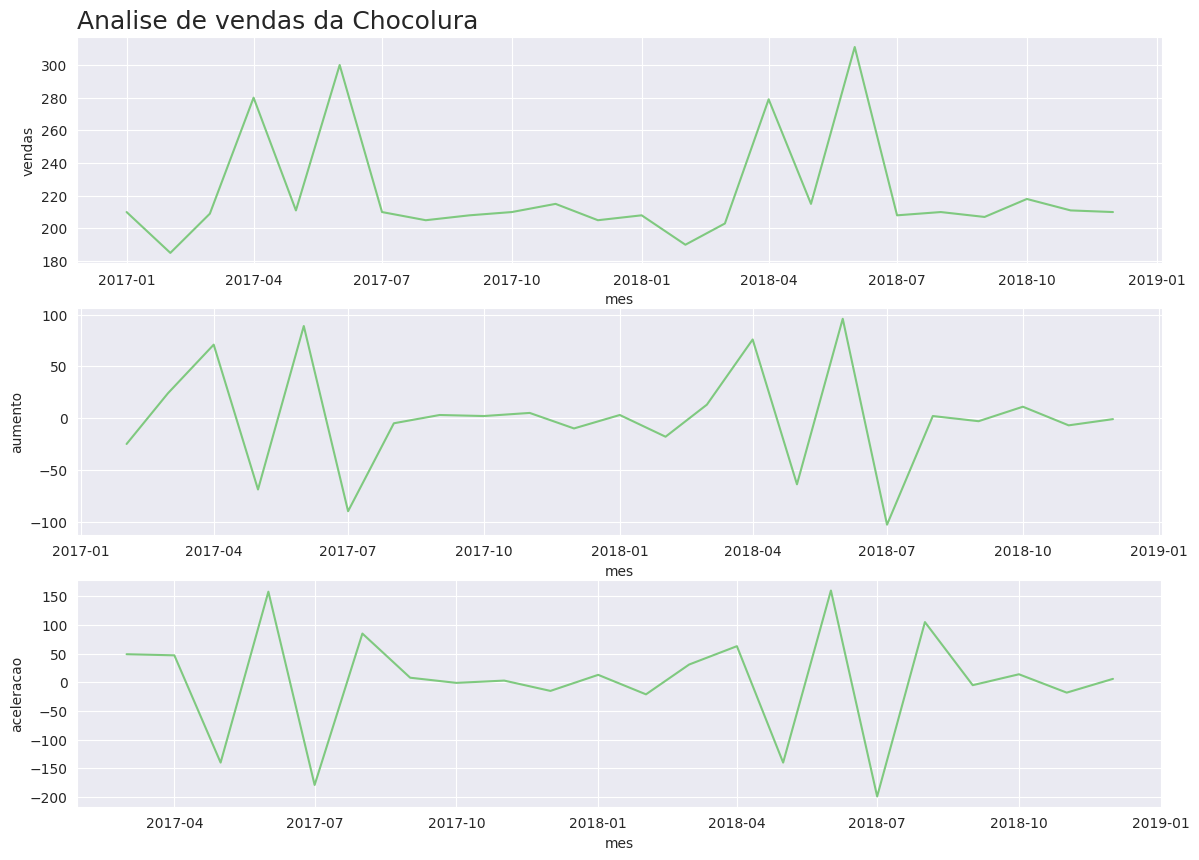

In [304]:
plot_comparacao('mes','vendas','aumento', 'aceleracao',chocolura,'Analise de vendas da Chocolura')

### **Investigando as vendas diárias da Chocolura (Outubro e Novembro)**

In [305]:
vendas_diarias = pd.read_csv('https://raw.githubusercontent.com/eduardoparada/cursos_alura_DS/main/DS_series_temporais/Arquivos%20complementares/vendas_por_dia.csv', sep =',')

In [306]:
vendas_diarias.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [307]:
print('Quantidade de linhas e colunas:', vendas_diarias.shape)
print("Quantidade de dados nulos:", vendas_diarias.isna().sum().sum())
vendas_diarias.dtypes

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


dia       object
vendas     int64
dtype: object

In [308]:
vendas_diarias['dia'] = pd.to_datetime(vendas_diarias['dia'])

In [309]:
vendas_diarias['aumento'] = vendas_diarias['vendas'].diff()
vendas_diarias['aceleracao'] = vendas_diarias['aumento'].diff()
vendas_diarias.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


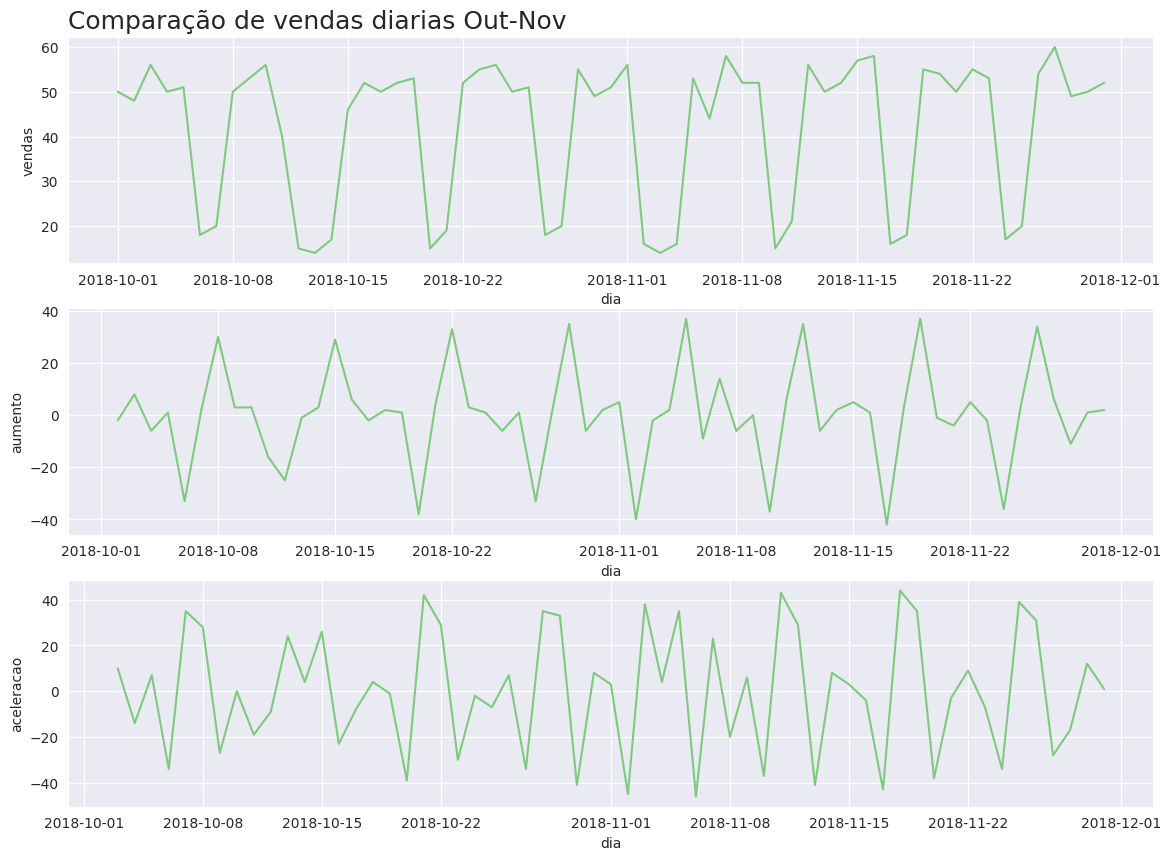

In [310]:
plot_comparacao('dia','vendas','aumento','aceleracao',vendas_diarias,'Comparação de vendas diarias Out-Nov')

In [311]:
#convertendo as vendas por dia(data) para dia(nominal/semana), exemplo: de 01/01/2024 para segunda-feira

vendas_diarias['dia_da_semana'] = vendas_diarias['dia'].dt.day_name()

In [312]:
vendas_diarias.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [313]:
vendas_diarias['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [314]:
#criando um dicionário com os dias da semana e traduzindo para portugues

dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta',
                   'Friday':'Sexta', 'Saturday':'Sabado','Sunday':'Domingo'}

In [315]:
#substituindo os dias para dias traduzidos

vendas_diarias['dia_da_semana'] = vendas_diarias['dia_da_semana'].map(dias_traduzidos)
vendas_diarias.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [316]:
vendas_diarias.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


In [317]:
#Fazendo uma média de venda diária, agrupando os dias da semana

vendas_agrupadas = vendas_diarias.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()

<ipython-input-317-718850afa5a0>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_diarias.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()


In [318]:
vendas_agrupadas #quedas mais acentuadas acontecem aos finais de semana, especialmente no sabado

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terça,52.0,-1.0,-34.0


## **Correlação das vendas diárias**

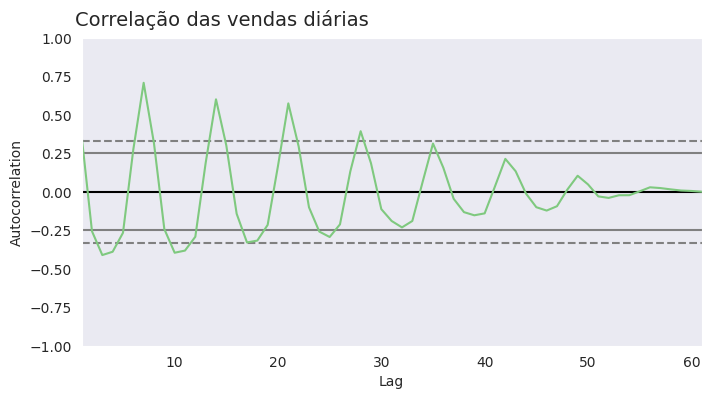

In [319]:
ax = plt.figure(figsize =(8,4))
ax.suptitle("Correlação das vendas diárias", fontsize = 14, x=0.3, y=0.95)
autocorrelation_plot(vendas_diarias['vendas'])
ax=ax

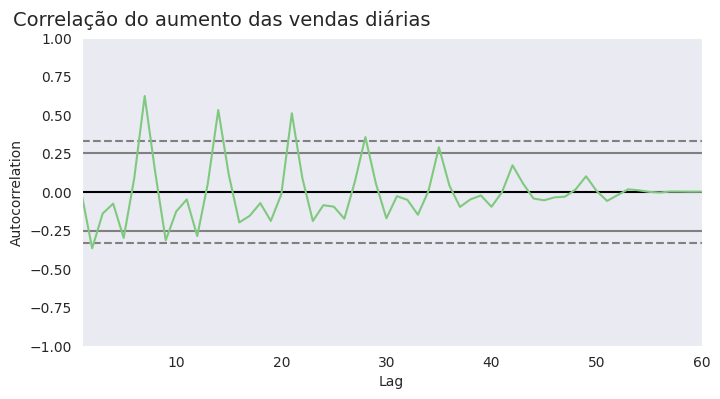

In [320]:
ax = plt.figure(figsize =(8,4))
ax.suptitle("Correlação do aumento das vendas diárias", fontsize = 14, x=0.3, y=0.95)
autocorrelation_plot(vendas_diarias['aumento'][1:])
ax=ax

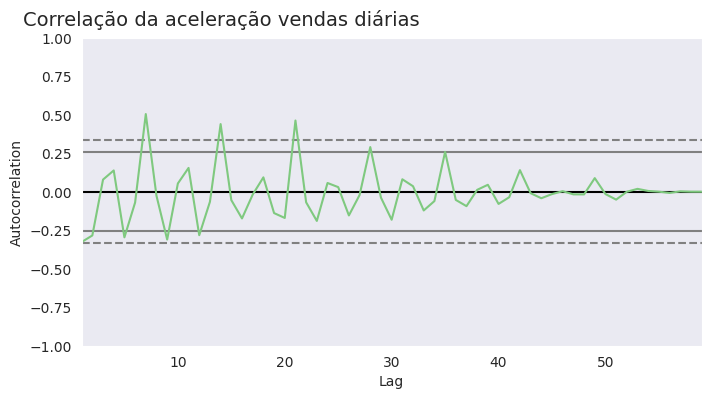

In [321]:
ax = plt.figure(figsize =(8,4))
ax.suptitle("Correlação da aceleração vendas diárias", fontsize = 14, x=0.3, y=0.95)
autocorrelation_plot(vendas_diarias['aceleracao'][2:])
ax=ax

## **Normalização**

**Cafelura - Análise de vendas**

In [322]:
cafelura = pd.read_csv('https://raw.githubusercontent.com/eduardoparada/cursos_alura_DS/main/DS_series_temporais/Arquivos%20complementares/cafelura.csv', sep =',')

In [323]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [324]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print("Quantidade de dados nulos:", cafelura.isna().sum().sum())
cafelura.dtypes

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


mes       object
vendas     int64
dtype: object

In [325]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

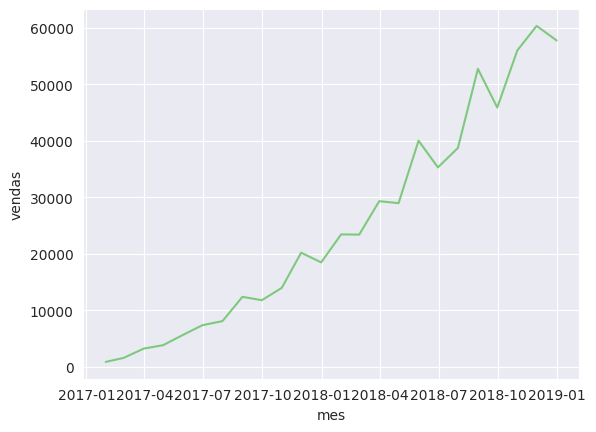

In [326]:
#plotando gráficos de vendas

ax = sns.lineplot(data = cafelura, x='mes',y='vendas')
ax=ax

In [327]:
qtd_fds = pd.read_csv('https://github.com/eduardoparada/cursos_alura_DS/raw/main/DS_series_temporais/Arquivos%20complementares/dias_final_de_semana.csv', sep=',')

In [328]:
qtd_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [329]:
qtd_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [330]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/qtd_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


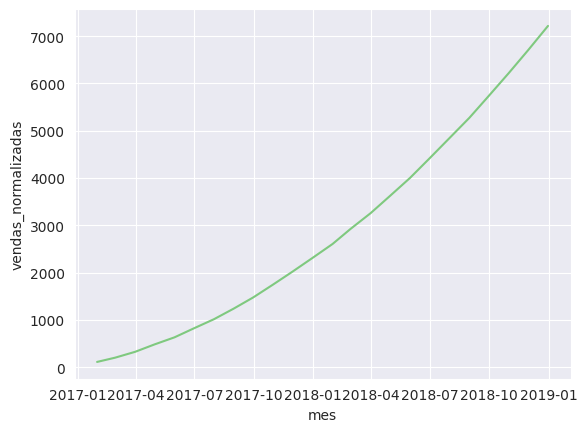

In [331]:
#vendas normalizadas

ax = sns.lineplot(data = cafelura, x='mes',y='vendas_normalizadas')
ax = ax

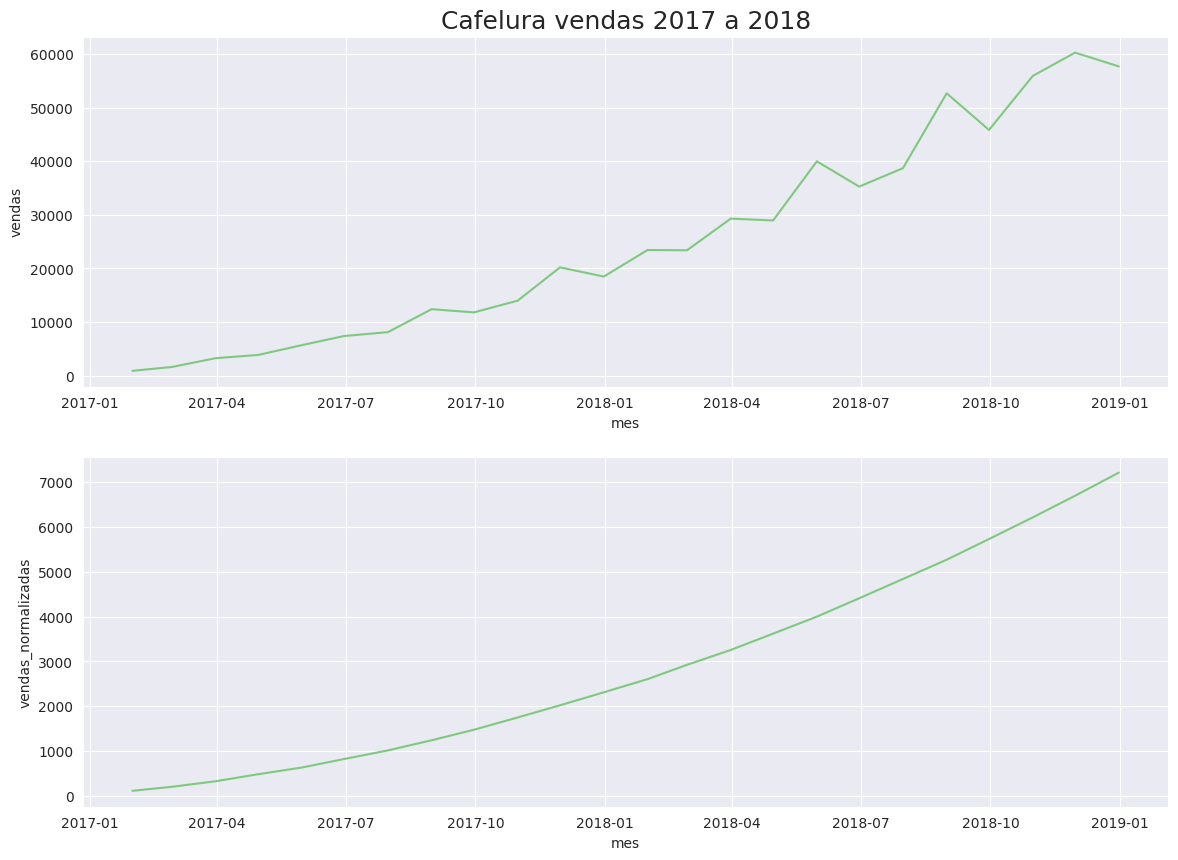

In [332]:
plt.figure(figsize=(14,10))
ax = plt.subplot(2,1,1)
ax.set_title('Cafelura vendas 2017 a 2018', fontsize = 18)
ax = sns.lineplot(data = cafelura, x='mes',y='vendas')
ax = ax
ax = plt.subplot(2,1,2)
ax = sns.lineplot(data = cafelura, x='mes',y='vendas_normalizadas')
ax = ax

## **Statsmodel**

Biblioteca para análise de séries temporais

In [333]:
#importando o seasonal_decompose da statsmodel

from statsmodels.tsa.seasonal import seasonal_decompose

In [334]:
#setar data como indice do cafelura

chocolura = chocolura.set_index('mes')

<Figure size 1200x800 with 0 Axes>

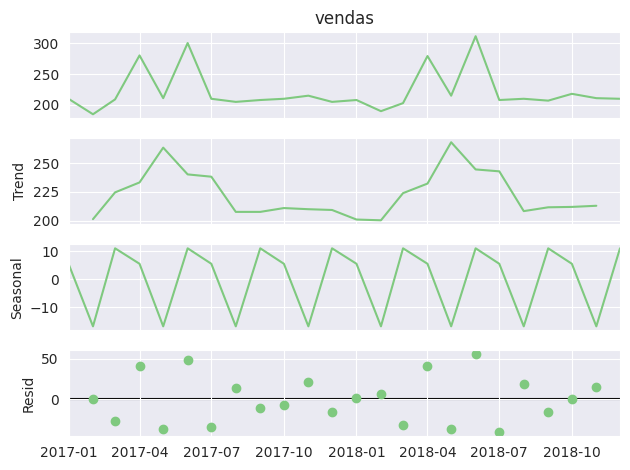

In [335]:
resultado = seasonal_decompose(chocolura['vendas'],period=3)
plt.figure(figsize=(12, 8))
ax = resultado.plot()

In [336]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [337]:
data =({
    'observacao': observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
mes,,,,
2017-01-01,210.0,NaN,5.603175,NaN
2017-02-01,185.0,201.333333,-16.730159,0.396825
2017-03-01,209.0,224.666667,11.126984,-26.793651
2017-04-01,280.0,233.333333,5.603175,41.063492
2017-05-01,211.0,263.666667,-16.730159,-35.936508


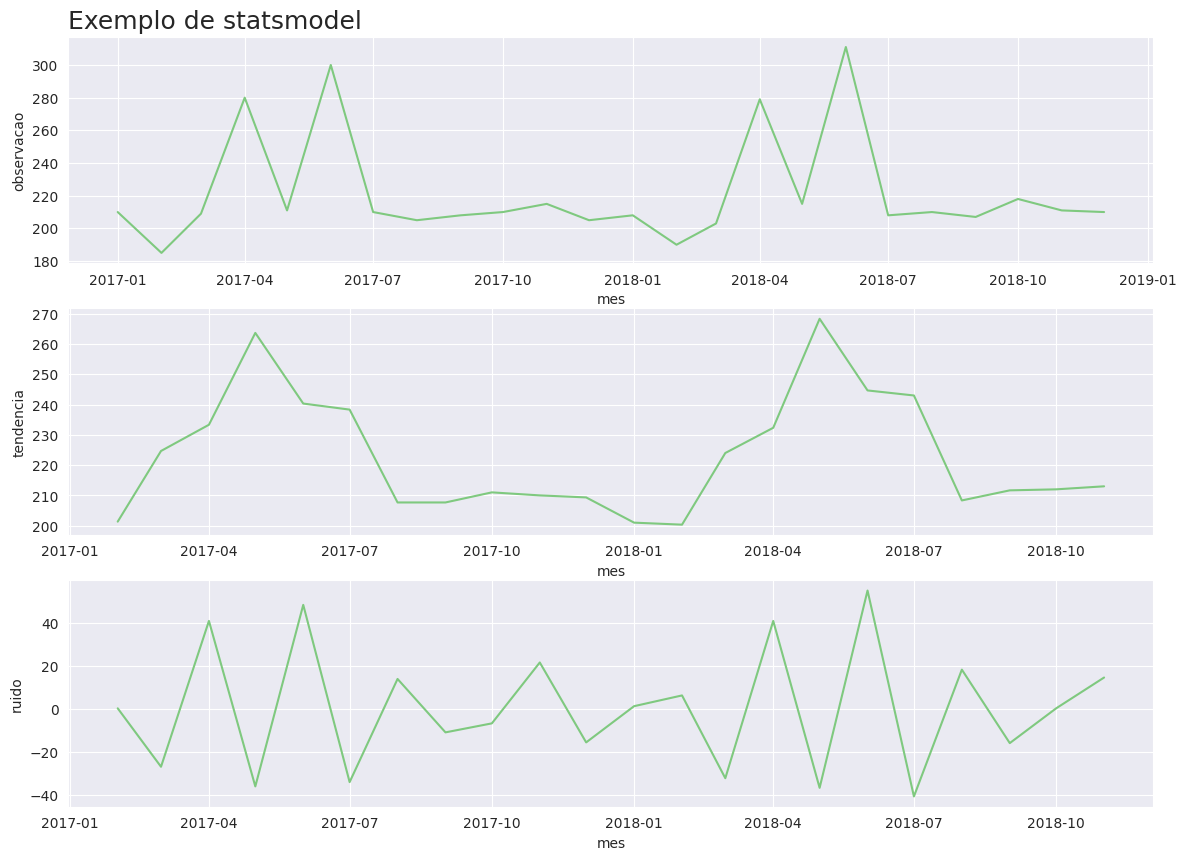

In [338]:
plot_comparacao(resultado.index, 'observacao','tendencia','ruido',resultado,'Exemplo de statsmodel' )

## **Analisando a empresa Alucel**

In [339]:
alucel = pd.read_csv('https://github.com/eduardoparada/cursos_alura_DS/raw/main/DS_series_temporais/Arquivos%20complementares/alucel.csv', sep=',')

In [340]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [341]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [342]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [343]:
print('qtd de linhas e colunas', alucel.shape)
print('qtd de dados nulos', alucel.isna().sum().sum())

qtd de linhas e colunas (61, 2)
qtd de dados nulos 0


In [344]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

In [345]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


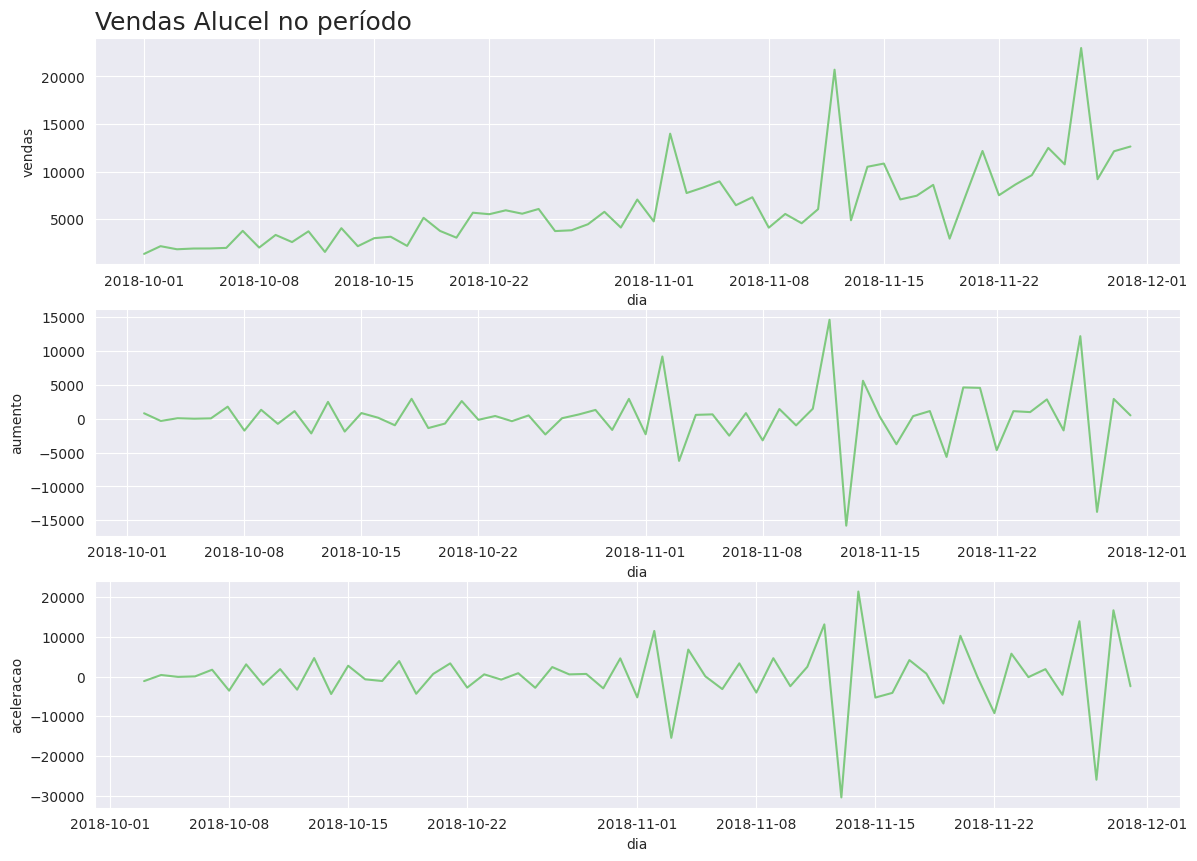

In [346]:
plot_comparacao('dia','vendas','aumento', 'aceleracao',alucel,'Vendas Alucel no período')

In [347]:
#removendo os ruídos para analisar a tendencia, normalizando com média móvel usando o rolling e mean do pandas

alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [348]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


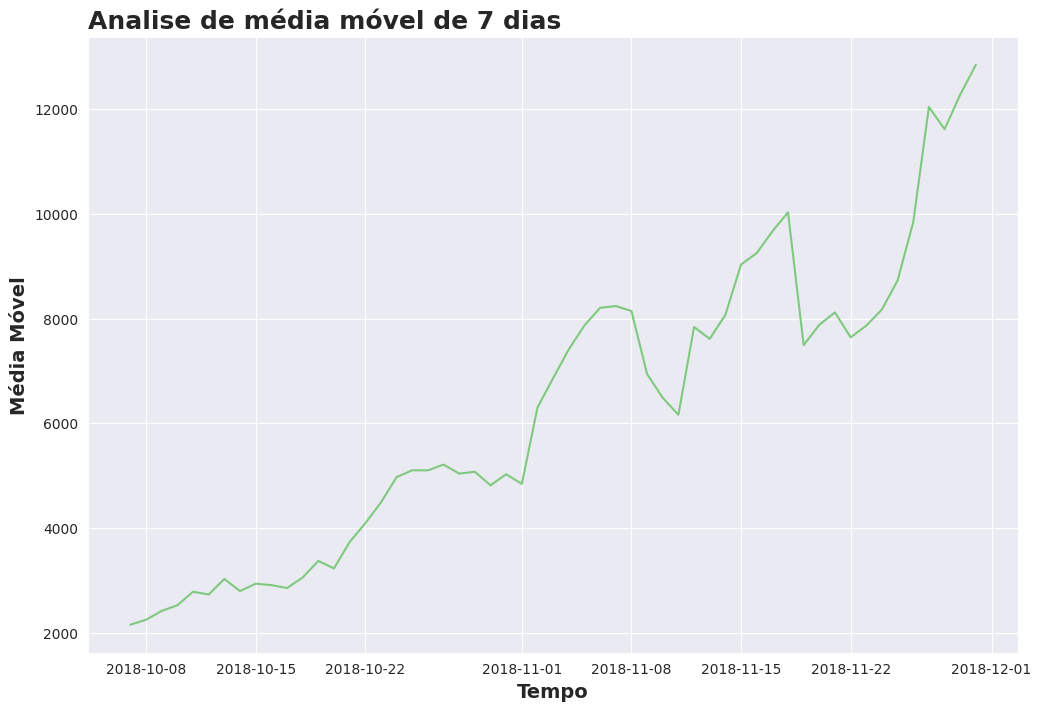

In [349]:
#plotando gráfico para comparação

plotar('Analise de média móvel de 7 dias','Tempo','Média Móvel','dia','media_movel', alucel)

In [350]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

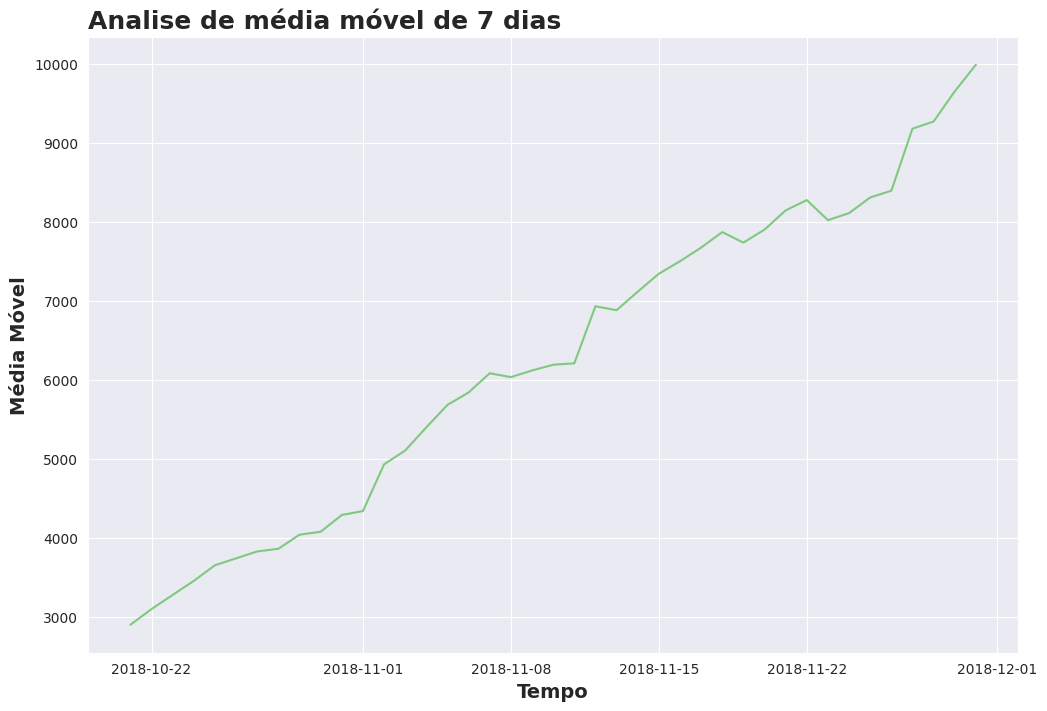

In [351]:
plotar('Analise de média móvel de 7 dias','Tempo','Média Móvel','dia','media_movel_21', alucel)

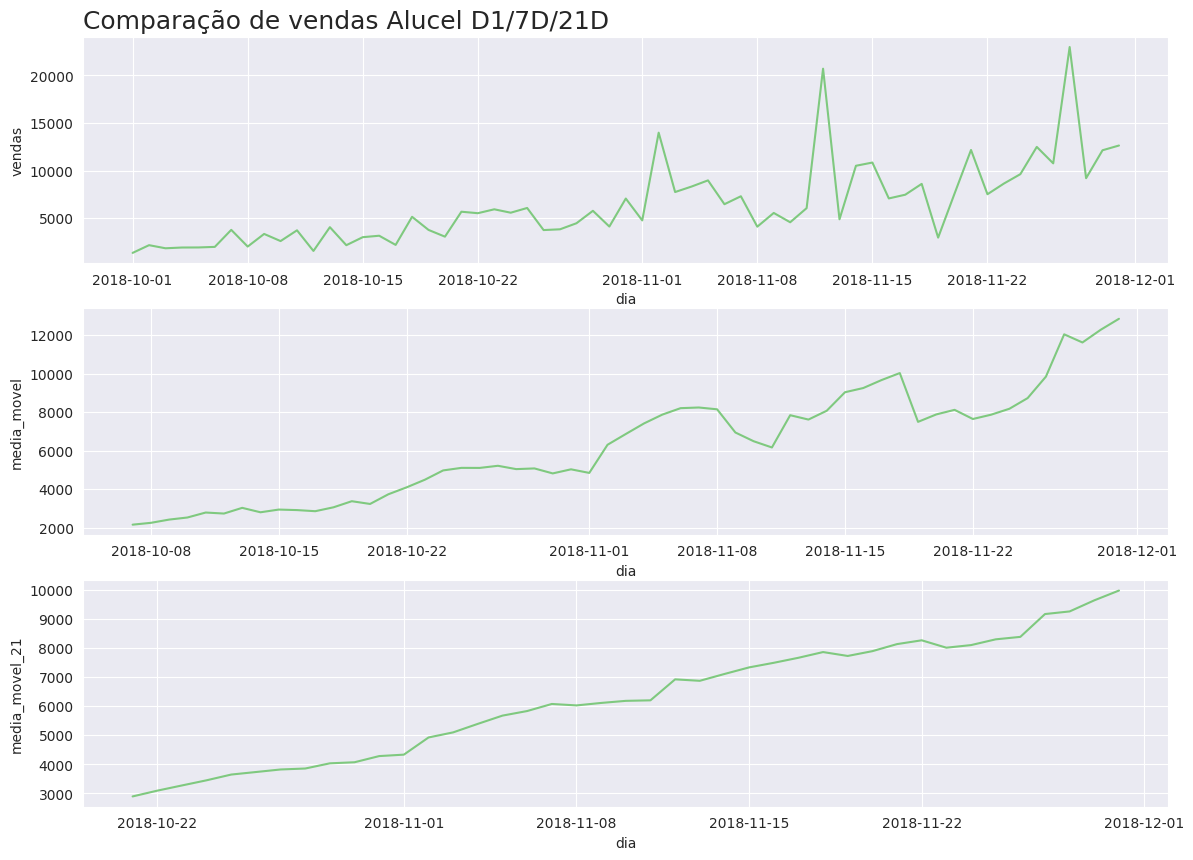

In [353]:
plot_comparacao('dia','vendas','media_movel','media_movel_21',alucel,'Comparação de vendas Alucel D1/7D/21D')